<a href="https://colab.research.google.com/github/Karincheong/Zalando-Product-Matching-Challenge/blob/main/Zalando_Product_Matching_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CA684 Machine Learning Assignment Spring 2022

Dublin City University has teamed up with leading online fashion retailer Zalando to create the 2022 CA684 Machine Learning assignment.

## Introduction

As a customer proposition, Zalando strives for “trustworthy” prices. That is, the company wants to offer competitive prices in each of its dynamic market environments, to alleviate its customers from having to compare prices, and to drive revenue growth. In order to do that for its hundreds of thousands of individual products, Zalando needs to Identify exact product matches across the relevant European competitors.

A very similar use case exists at stores like Amazon or Walmart, which allow multiple sellers to offer the same product on their platform: identical products need to be grouped together, even when the names, descriptions, images, etc. are not exactly the same.

## Challenge

Barcode systems like EAN allow for unique identification of every product. Unfortunately, reliable EAN information is not always available. Zalando uses multi-modal data to solve the problem, relying on images and text. For this challenge, we are asking to make intelligent use of text data (such as product titles, colors and descriptions). As these are not standardized, and often manually written / changed for marketing purposes, matching products is a non-trivial task.

This challenge has a direct business impact for a retailer like Zalando. It is also closely related to many other problems, like record deduplication in heterogeneous catalogues, document retrieval, and many more.



###Student Name :  Cheong Hao Io
Student Email:  hao.cheong3@mail.dcu.ie
Student number: 21267114

Step 1: Connect with Google Colab

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
pip install thefuzz

In [ ]:
pip install parquet


     |████████████████████████████████| 361 kB 11.5 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
  Created wheel for thriftpy2: filename=thriftpy2-0.4.14-cp37-cp37m-linux_x86_64.whl size=944430 sha256=cc4cf5e8eae5faff5201ca146f286c877979228541c7a8aed7e6c8424b0a41f0
  Stored in directory: /root/.cache/pip/wheels/2a/f5/49/9c0d851aa64b58db72883cf9393cc824d536bdf13f5c83cff4
Successfully built thriftpy2


In [ ]:
pip install sparse-dot-topn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for sparse-dot-topn: filename=sparse_dot_topn-0.3.1-cp37-cp37m-linux_x86_64.whl size=1582018 sha256=7e9f975ca7c88b297d06b01a21e3276cd41d351ee8181abb23c71088d05ad094
  Stored in directory: /root/.cache/pip/wheels/3b/3e/02/4ee8cb28ed8b608d530bc43402518a895db8ce89aff8ca4e1f
Successfully built sparse-dot-topn


In [ ]:
pip install stylecloud

     |████████████████████████████████| 262 kB 9.5 MB/s 
     |████████████████████████████████| 161 kB 47.7 MB/s 
     |████████████████████████████████| 87 kB 6.4 MB/s 
     |████████████████████████████████| 87 kB 7.1 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=e519f578edc28bb1d88b9251e6e58c95fd08e7b8f7739bb2344416a9246541f2
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=5dadebaaee5f68cc79b8e8b13b9dd464c96b8f327717be4ff34c99e56f0dc288
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=b9b6d3702a5ce14ca4568d0eea1d10a1ad7f0d437ad232fd88e0c066c14c203e
  Stored in directory: /root/.cache/pip/wheels/6c/66/e8/e53d7a476011891fa51a5ee83a2d1852b19b258f975

In [ ]:
# libraries
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import urllib
from random import choices
from itertools import chain
from pandas.io.parquet import PyArrowImpl
# Levenshtein Distance in Python
# https://github.com/seatgeek/thefuzz #string matching

from thefuzz import fuzz, process
# Read parquet files
from pandas.io.parquet import PyArrowImpl
# Matplotlib configuration
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

#  Importing libraries and module and some setting for notebook
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix
import sparse_dot_topn.sparse_dot_topn as ct  # Leading Juice for us
import time
pd.set_option('display.max_colwidth', -1)

# Pandas config
pd.options.mode.chained_assignment = None  # default='warn'

/usr/local/lib/python3.7/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## Dataset

The dataset will contain files as follows.

* Two files containing **offers of products**, for training and testing respectively. An offer is a particular description of a product by an online shop, either Zalando or one of its competitors. They contains the following fields:

| Label | Description |
|:-----:|:------------|
| offer_id | unique identifier for an offer of a product (i.e. a product x shop combination, where we don’t know the product component) |
| shop | "zalando", "aboutyou" |
| lang | "de" (German) |
| brand | e.g. "Nike" - note that different `shop`s might have different `brand` nomenclature |
| color | e.g. "blue" - note that there could be more than one and different `shop`s might have different `brand` nomenclature ("ocean", "light blue", "...") and may have more than one color (ordering matters) |
| title | e.g. "White Nike tennis top" |
| description | a long product description that can may contain material composition, cleaning instructions, etc |
| price | price in euro without any discount |
| url | url of the product description page |
| image_urls | list of product images such as stock photo, with model, lifestyle photo, or close up |

* A separate file containing the **matches** in between those offers that describe the same products using the offer id. Note this is only provided for the training offers.

| Label | Description |
|:-----:|:------------|
| zalando | offer_id from “zalando” shop |
| aboutyou | offer_id from “aboutyou” shop |
| brand | unique identifier for the brand representing the match |

Step 2: Load in working Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#locate local google drive
%cd drive/My Drive/assignment/assignment

/content/drive/My Drive/assignment/assignment


In [ ]:
!ls {offers,matches}_{training,test}.parquet

ls: cannot access 'matches_test.parquet': No such file or directory
matches_training.parquet  offers_test.parquet  offers_training.parquet


In [ ]:
offers_training_df = pd.read_parquet('offers_training.parquet')
offers_training_df

,offer_id,shop,lang,brand,color,title,description,price,url,image_urls
0,d8e0dba8-98e8-48db-9850-dd30cff374e0,aboutyou,de,PIECES,hellblau | Blau,Kleid,"{""Material"": [""Baumwolle""], ""\u00c4rmell\u00e4nge"": [""\u00c4rmellos""], ""Tr\u00e4gerart"": [""Normaler Tr\u00e4ger""], ""Ausschnitt"": [""Rundhals-Ausschnitt""], ""L\u00e4nge"": [""Kurz/Mini""], ""Marke"": [""PIECES""], ""Passform"": [""Figurbetonte Passform""], ""Zielgruppe"": [""Frauen""], ""Quick Filter Style Group"": [""Trend""], ""Suchfarbe"": [""Blau""], ""Gr\u00f6\u00dfenlauf"": [""Damen - Intern.""], ""Detailfarbe"": [""hellblau""], ""Ordersaison"": [""FS 21""], ""Muster"": [""Unifarben""], ""Business"": [""Freizeit""], ""Design"": [""Rippstrick"", ""Eingefasster Ausschnitt""], ""Extras"": [""Weicher Griff"", ""Ton-in-Ton-N\u00e4hte""], ""Ursprungsland"": [""T\u00fcrkei""], ""Saison"": [""Fr\u00fchjahr / Sommer""], ""Geschlecht"": [""Frauen""], ""Size Chart"": [""female tops""], ""Produktart"": [""Kleid""], ""Gr\u00f6\u00dfe"": [""def_female_konf""], ""Sondergr\u00f6\u00dfen f\u00fcr Kategoriezuordnung"": [""Kleine Cups"", ""Mittlere Cups"", ""Gro\u00dfe Cups""], ""styleCluster"": [""6""], ""Display Colors"": [""hellblau""], ""Style group"": [""trend""], ""Brand logo"": [""PIECES""], ""Name"": [""Kleid""], ""Description"": [""- Rundhalsausschnitt\n- Dehnbares geripptes Material\n- Einfarbig\n- K\u00f6rperbetonte Passform""], ""Produkt Beschreibung"": ""- Rundhalsausschnitt\n- Dehnbares geripptes Material\n- Einfarbig\n- K\u00f6rperbetonte Passform"", ""Materialzusammensetzung"": ""Material 95 Baumwolle % 5 Elasthan %"", ""Bulletpoints"": ""Rundhalsausschnitt Dehnbares geripptes Material Einfarbig""}",24.990000,https://www.aboutyou.de/p/pieces/kleid-6732409,"[https://cdn.aboutstatic.com/file/images/06728ca28bd977a249d2888ec0d58bef.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/26dfad2c63c77744f070801ce987eb8e.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/071ed00f251eb6ec15060c2b52b86602.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/6ef1c268348d2a489a1df8296d6451fb.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/a55f03c0a629c2e03dae5f248823e616.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/d416c092959786e96390e6473d985579.jpg?width=600&height=800&quality=0.90]"
1,c0a743f8-68cf-44dc-80cf-b5edbe70ecb7,aboutyou,de,LASCANA,schwarz | mischfarben | Schwarz,Bikinihose,"{""Leibh\u00f6he"": [""Super Low Waist""], ""Marke"": [""LASCANA""], ""Quick Filter Style Group"": [""Klassisch""], ""Suchfarbe"": [""Schwarz""], ""Gr\u00f6\u00dfenlauf"": [""Damen - Konf. D""], ""Detailfarbe"": [""schwarz"", ""mischfarben""], ""Muster"": [""Gebl\u00fcmt/floral""], ""Design"": [""Abgesteppter Saum/Kante""], ""Extras"": [""Label Plate"", ""Applikationen""], ""Vendorsizerun-Label"": [""Deutsche Konfektion""], ""Gr\u00f6\u00dfe"": [""def_female_int""], ""Sondergr\u00f6\u00dfen f\u00fcr Kategoriezuordnung"": [""Gro\u00dfe Gr\u00f6\u00dfe"", ""Mittlere Cups"", ""Kleine Cups"", ""Gro\u00dfe Cups""], ""Geschlecht"": [""Frauen""], ""Produktart"": [""Bikinihose""], ""Supplier"": [""Otto""], ""Neu"": [""new_aoat""], ""Material Nachhaltigkeit"": [""Recyceltes Polyamid""], ""Nachhaltigkeit"": [""Eco-Friendly material""], ""Display Colors"": [""schwarz""], ""Style group"": [""modern""], ""Brand logo"": [""LASCANA""], ""Sustainable"": true, ""Sponsor badge"": [""sponsorBadge""], ""Sponsored type"": [""sponsoredType""], ""Name"": [""Bikinihose""], ""Description"": [""<table class=\""tmpArticleDetailTable\""><caption><b>Produktdetails</b></caption><tbody><tr><td class=\""left\""><div><span>Pflegehinweise</span></div></td><td>Handw&auml;sche</td></tr></tbody></table>""], ""Produkt Beschreibung"": ""<table class=\""tmpArticleDetailTable\""><caption><b>Produktdetails</b></caption><tbody><tr><td class=\""left\""><div><span>Pflegehinweise</span></div>

In [ ]:
offers_test_df = pd.read_parquet('offers_test.parquet')
offers_test_df


,offer_id,shop,lang,brand,color,title,description,price,url,image_urls
0,67069c3c-46a7-45ea-ae0f-1cac2571ae68,aboutyou,de,DKNY,beige | Beige,Schal,"{""Marke"": [""DKNY""], ""Gr\u00f6\u00dfenlauf"": [""Unisex - Onesize (Onesize, Onesize, Einheitsgr\u00f6\u00dfe, 1)""], ""Detailfarbe"": [""beige""], ""Suchfarbe"": [""Beige""], ""Assortment Type"": [""Second Hand""], ""Zustand"": [""Mit Sch\u00f6nheitsfehlern""], ""Kategorieattribut"": [""Schal""], ""Versand durch"": [""Carou""], ""Substilgruppe"": [""Regular Second Hand""], ""Zustand \u2013 Mit Sch\u00f6nheitsfehlern"": [""Der Artikel wurde getragen und hat sichtbare Gebrauchsspuren.""], ""Second Hand Type"": [""Regular Second Hand""], ""Gebraucht"": true, ""Ausrichtung Marke"": [""Premium""], ""Geschlecht"": [""Frauen""], ""Quick Filter Style Group"": [""Premium""], ""Gr\u00f6\u00dfe"": [""Unisex - Onesize (Onesize, Onesize, Einheitsgr\u00f6\u00dfe, 1)""], ""Display Colors"": [""beige""], ""Style group"": [""premium""], ""Brand logo"": [""DKNY""], ""Name"": [""Schal""], ""Description"": [""""]}",49.990000,https://www.aboutyou.de/p/dkny/schal-7221536,"[https://cdn.aboutstatic.com/file/images/d84322132c044ee5c283f954a1be1269.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/254abcf31f149239d0ffac5cc7bf1d0b.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/98034e4993801e489917f6bdaee1d3d5.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/8064073408854d801ef64433e33a47e8.JPG?width=600&height=800&quality=0.90]"
1,c065bcd3-0669-4061-b1ce-fd6467f81b91,aboutyou,de,MICHAEL Michael Kors,schwarz | Mischfarben,Plisseerock,"{""Marke"": [""MICHAEL Michael Kors""], ""Gr\u00f6\u00dfenlauf"": [""Damen - Konf. D""], ""Suchfarbe"": [""Mischfarben""], ""Assortment Type"": [""Second Hand""], ""Zustand"": [""Wie neu""], ""Kategorieattribut"": [""Faltenr\u00f6cke""], ""Versand durch"": [""Carou""], ""Detailfarbe"": [""schwarz""], ""Ausrichtung Marke"": [""Premium""], ""Substilgruppe"": [""Regular Second Hand""], ""Zustand \u2013 Wie neu"": [""Der Artikel wurde nicht getragen, sondern h\u00f6chstens anprobiert. Manche dieser Artikel tragen noch ihr Etikett.""], ""Vendorsizerun-Label"": [""Deutsche Konfektion""], ""Second Hand Type"": [""Regular Second Hand""], ""Gebraucht"": true, ""Geschlecht"": [""Frauen""], ""Size Chart"": [""female bottoms""], ""Size Advisor"": true, ""Gr\u00f6\u00dfe"": [""def_female_int""], ""Sondergr\u00f6\u00dfen f\u00fcr Kategoriezuordnung"": [""Kleine Cups""], ""Brand logo"": [""MICHAEL Michael Kors""], ""Name"": [""Plisseerock""], ""Description"": [""""]}",79.980000,https://www.aboutyou.de/p/michael-michael-kors/plisseerock-7213763,"[https://cdn.aboutstatic.com/file/images/687cdafa2c8d31bd1b539fc3b12ec38d.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/1e9fbbf39971e5dc414afdfb59c6b26d.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/7544e2390336b118bee8c73dd65934d7.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/501506459062ba15bb99f8b1d9046fd1.JPG?width=600&height=800&quality=0.90]"
2,7dfb8ecf-ba37-42dc-9287-78bac2b0e192,aboutyou,de,MICHAEL Michael Kors,hellbraun | mokka | Braun,Tasche,"{""Zielgruppe"": [""Female""], ""Gr\u00f6\u00dfe (Volumen)"": [""Klein (< 25 l)""], ""Gurt-/Henkell\u00e4nge"": [""Kurzer Trageriemen / Henkel""], ""Marke"": [""MICHAEL Michael Kors""], ""Material"": [""Lederimitat""], ""Verschlussart"": [""Druckknopf""], ""Ausrichtung Marke"": [""Premium""], ""Suchfarbe"": [""Braun""], ""Gr\u00f6\u00dfenlauf"": [""Unisex - Onesize (Onesize, Onesize, Einheitsgr\u00f6\u00dfe, 1)""], ""Detailfarbe"": [""hellbraun"", ""mokka""], ""Ordersaison"": [""HW 21""], ""Muster"": [""Logoprint""], ""Business"": [""Freizeit""], ""Design"": [""Ger\u00e4umiges Hauptfach"", ""Rei\u00dfverschluss"", ""Rei\u00dfverschlussfach innen""], ""Extras"": [""Metall\u00f6sen"", ""Robuster Stoff"", ""All-Over-M

## Exploratory Data Analysis

It is important to familiarize yourself with the dataset by using measures of centrality (e.g. mean) and statistical dispersion (e.g. variance) and data visualization methods. The following is just some Pandas preprocessing and Matplotlib visualizations to get you started. Feel free to explore the data much further and come up with ideas that might help you in the matching task!

Offers of Products

In [ ]:
offers_training_df = pd.read_parquet('offers_training.parquet')
offers_training_df

,offer_id,shop,lang,brand,color,title,description,price,url,image_urls
0,d8e0dba8-98e8-48db-9850-dd30cff374e0,aboutyou,de,PIECES,hellblau | Blau,Kleid,"{""Material"": [""Baumwolle""], ""\u00c4rmell\u00e4nge"": [""\u00c4rmellos""], ""Tr\u00e4gerart"": [""Normaler Tr\u00e4ger""], ""Ausschnitt"": [""Rundhals-Ausschnitt""], ""L\u00e4nge"": [""Kurz/Mini""], ""Marke"": [""PIECES""], ""Passform"": [""Figurbetonte Passform""], ""Zielgruppe"": [""Frauen""], ""Quick Filter Style Group"": [""Trend""], ""Suchfarbe"": [""Blau""], ""Gr\u00f6\u00dfenlauf"": [""Damen - Intern.""], ""Detailfarbe"": [""hellblau""], ""Ordersaison"": [""FS 21""], ""Muster"": [""Unifarben""], ""Business"": [""Freizeit""], ""Design"": [""Rippstrick"", ""Eingefasster Ausschnitt""], ""Extras"": [""Weicher Griff"", ""Ton-in-Ton-N\u00e4hte""], ""Ursprungsland"": [""T\u00fcrkei""], ""Saison"": [""Fr\u00fchjahr / Sommer""], ""Geschlecht"": [""Frauen""], ""Size Chart"": [""female tops""], ""Produktart"": [""Kleid""], ""Gr\u00f6\u00dfe"": [""def_female_konf""], ""Sondergr\u00f6\u00dfen f\u00fcr Kategoriezuordnung"": [""Kleine Cups"", ""Mittlere Cups"", ""Gro\u00dfe Cups""], ""styleCluster"": [""6""], ""Display Colors"": [""hellblau""], ""Style group"": [""trend""], ""Brand logo"": [""PIECES""], ""Name"": [""Kleid""], ""Description"": [""- Rundhalsausschnitt\n- Dehnbares geripptes Material\n- Einfarbig\n- K\u00f6rperbetonte Passform""], ""Produkt Beschreibung"": ""- Rundhalsausschnitt\n- Dehnbares geripptes Material\n- Einfarbig\n- K\u00f6rperbetonte Passform"", ""Materialzusammensetzung"": ""Material 95 Baumwolle % 5 Elasthan %"", ""Bulletpoints"": ""Rundhalsausschnitt Dehnbares geripptes Material Einfarbig""}",24.990000,https://www.aboutyou.de/p/pieces/kleid-6732409,"[https://cdn.aboutstatic.com/file/images/06728ca28bd977a249d2888ec0d58bef.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/26dfad2c63c77744f070801ce987eb8e.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/071ed00f251eb6ec15060c2b52b86602.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/6ef1c268348d2a489a1df8296d6451fb.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/a55f03c0a629c2e03dae5f248823e616.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/d416c092959786e96390e6473d985579.jpg?width=600&height=800&quality=0.90]"
1,c0a743f8-68cf-44dc-80cf-b5edbe70ecb7,aboutyou,de,LASCANA,schwarz | mischfarben | Schwarz,Bikinihose,"{""Leibh\u00f6he"": [""Super Low Waist""], ""Marke"": [""LASCANA""], ""Quick Filter Style Group"": [""Klassisch""], ""Suchfarbe"": [""Schwarz""], ""Gr\u00f6\u00dfenlauf"": [""Damen - Konf. D""], ""Detailfarbe"": [""schwarz"", ""mischfarben""], ""Muster"": [""Gebl\u00fcmt/floral""], ""Design"": [""Abgesteppter Saum/Kante""], ""Extras"": [""Label Plate"", ""Applikationen""], ""Vendorsizerun-Label"": [""Deutsche Konfektion""], ""Gr\u00f6\u00dfe"": [""def_female_int""], ""Sondergr\u00f6\u00dfen f\u00fcr Kategoriezuordnung"": [""Gro\u00dfe Gr\u00f6\u00dfe"", ""Mittlere Cups"", ""Kleine Cups"", ""Gro\u00dfe Cups""], ""Geschlecht"": [""Frauen""], ""Produktart"": [""Bikinihose""], ""Supplier"": [""Otto""], ""Neu"": [""new_aoat""], ""Material Nachhaltigkeit"": [""Recyceltes Polyamid""], ""Nachhaltigkeit"": [""Eco-Friendly material""], ""Display Colors"": [""schwarz""], ""Style group"": [""modern""], ""Brand logo"": [""LASCANA""], ""Sustainable"": true, ""Sponsor badge"": [""sponsorBadge""], ""Sponsored type"": [""sponsoredType""], ""Name"": [""Bikinihose""], ""Description"": [""<table class=\""tmpArticleDetailTable\""><caption><b>Produktdetails</b></caption><tbody><tr><td class=\""left\""><div><span>Pflegehinweise</span></div></td><td>Handw&auml;sche</td></tr></tbody></table>""], ""Produkt Beschreibung"": ""<table class=\""tmpArticleDetailTable\""><caption><b>Produktdetails</b></caption><tbody><tr><td class=\""left\""><div><span>Pflegehinweise</span></div>

In [ ]:
#Training set : Total product item numbers
f'Number of products in training: {len(offers_training_df):,}'

'Number of products in training: 102,884'

In [ ]:
offers_training_df[:5]

,offer_id,shop,lang,brand,color,title,description,price,url,image_urls
0,d8e0dba8-98e8-48db-9850-dd30cff374e0,aboutyou,de,PIECES,hellblau | Blau,Kleid,"{""Material"": [""Baumwolle""], ""\u00c4rmell\u00e4nge"": [""\u00c4rmellos""], ""Tr\u00e4gerart"": [""Normaler Tr\u00e4ger""], ""Ausschnitt"": [""Rundhals-Ausschnitt""], ""L\u00e4nge"": [""Kurz/Mini""], ""Marke"": [""PIECES""], ""Passform"": [""Figurbetonte Passform""], ""Zielgruppe"": [""Frauen""], ""Quick Filter Style Group"": [""Trend""], ""Suchfarbe"": [""Blau""], ""Gr\u00f6\u00dfenlauf"": [""Damen - Intern.""], ""Detailfarbe"": [""hellblau""], ""Ordersaison"": [""FS 21""], ""Muster"": [""Unifarben""], ""Business"": [""Freizeit""], ""Design"": [""Rippstrick"", ""Eingefasster Ausschnitt""], ""Extras"": [""Weicher Griff"", ""Ton-in-Ton-N\u00e4hte""], ""Ursprungsland"": [""T\u00fcrkei""], ""Saison"": [""Fr\u00fchjahr / Sommer""], ""Geschlecht"": [""Frauen""], ""Size Chart"": [""female tops""], ""Produktart"": [""Kleid""], ""Gr\u00f6\u00dfe"": [""def_female_konf""], ""Sondergr\u00f6\u00dfen f\u00fcr Kategoriezuordnung"": [""Kleine Cups"", ""Mittlere Cups"", ""Gro\u00dfe Cups""], ""styleCluster"": [""6""], ""Display Colors"": [""hellblau""], ""Style group"": [""trend""], ""Brand logo"": [""PIECES""], ""Name"": [""Kleid""], ""Description"": [""- Rundhalsausschnitt\n- Dehnbares geripptes Material\n- Einfarbig\n- K\u00f6rperbetonte Passform""], ""Produkt Beschreibung"": ""- Rundhalsausschnitt\n- Dehnbares geripptes Material\n- Einfarbig\n- K\u00f6rperbetonte Passform"", ""Materialzusammensetzung"": ""Material 95 Baumwolle % 5 Elasthan %"", ""Bulletpoints"": ""Rundhalsausschnitt Dehnbares geripptes Material Einfarbig""}",24.99,https://www.aboutyou.de/p/pieces/kleid-6732409,"[https://cdn.aboutstatic.com/file/images/06728ca28bd977a249d2888ec0d58bef.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/26dfad2c63c77744f070801ce987eb8e.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/071ed00f251eb6ec15060c2b52b86602.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/6ef1c268348d2a489a1df8296d6451fb.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/a55f03c0a629c2e03dae5f248823e616.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/d416c092959786e96390e6473d985579.jpg?width=600&height=800&quality=0.90]"
1,c0a743f8-68cf-44dc-80cf-b5edbe70ecb7,aboutyou,de,LASCANA,schwarz | mischfarben | Schwarz,Bikinihose,"{""Leibh\u00f6he"": [""Super Low Waist""], ""Marke"": [""LASCANA""], ""Quick Filter Style Group"": [""Klassisch""], ""Suchfarbe"": [""Schwarz""], ""Gr\u00f6\u00dfenlauf"": [""Damen - Konf. D""], ""Detailfarbe"": [""schwarz"", ""mischfarben""], ""Muster"": [""Gebl\u00fcmt/floral""], ""Design"": [""Abgesteppter Saum/Kante""], ""Extras"": [""Label Plate"", ""Applikationen""], ""Vendorsizerun-Label"": [""Deutsche Konfektion""], ""Gr\u00f6\u00dfe"": [""def_female_int""], ""Sondergr\u00f6\u00dfen f\u00fcr Kategoriezuordnung"": [""Gro\u00dfe Gr\u00f6\u00dfe"", ""Mittlere Cups"", ""Kleine Cups"", ""Gro\u00dfe Cups""], ""Geschlecht"": [""Frauen""], ""Produktart"": [""Bikinihose""], ""Supplier"": [""Otto""], ""Neu"": [""new_aoat""], ""Material Nachhaltigkeit"": [""Recyceltes Polyamid""], ""Nachhaltigkeit"": [""Eco-Friendly material""], ""Display Colors"": [""schwarz""], ""Style group"": [""modern""], ""Brand logo"": [""LASCANA""], ""Sustainable"": true, ""Sponsor badge"": [""sponsorBadge""], ""Sponsored type"": [""sponsoredType""], ""Name"": [""Bikinihose""], ""Description"": [""<table class=\""tmpArticleDetailTable\""><caption><b>Produktdetails</b></caption><tbody><tr><td class=\""left\""><div><span>Pflegehinweise</span></div></td><td>Handw&auml;sche</td></tr></tbody></table>""], ""Produkt Beschreibung"": ""<table class=\""tmpArticleDetailTable\""><caption><b>Produktdetails</b></caption><tbody><tr><td class=\""left\""><div><span>Pflegehinweise</span></div></td

In [ ]:
list(offers_training_df.columns)

['offer_id',
 'shop',
 'lang',
 'brand',
 'color',
 'title',
 'description',
 'price',
 'url',
 'image_urls']

In [ ]:
offers_training_df.head(4)

,offer_id,shop,lang,brand,color,title,description,price,url,image_urls
0,d8e0dba8-98e8-48db-9850-dd30cff374e0,aboutyou,de,PIECES,hellblau | Blau,Kleid,"{""Material"": [""Baumwolle""], ""\u00c4rmell\u00e4nge"": [""\u00c4rmellos""], ""Tr\u00e4gerart"": [""Normaler Tr\u00e4ger""], ""Ausschnitt"": [""Rundhals-Ausschnitt""], ""L\u00e4nge"": [""Kurz/Mini""], ""Marke"": [""PIECES""], ""Passform"": [""Figurbetonte Passform""], ""Zielgruppe"": [""Frauen""], ""Quick Filter Style Group"": [""Trend""], ""Suchfarbe"": [""Blau""], ""Gr\u00f6\u00dfenlauf"": [""Damen - Intern.""], ""Detailfarbe"": [""hellblau""], ""Ordersaison"": [""FS 21""], ""Muster"": [""Unifarben""], ""Business"": [""Freizeit""], ""Design"": [""Rippstrick"", ""Eingefasster Ausschnitt""], ""Extras"": [""Weicher Griff"", ""Ton-in-Ton-N\u00e4hte""], ""Ursprungsland"": [""T\u00fcrkei""], ""Saison"": [""Fr\u00fchjahr / Sommer""], ""Geschlecht"": [""Frauen""], ""Size Chart"": [""female tops""], ""Produktart"": [""Kleid""], ""Gr\u00f6\u00dfe"": [""def_female_konf""], ""Sondergr\u00f6\u00dfen f\u00fcr Kategoriezuordnung"": [""Kleine Cups"", ""Mittlere Cups"", ""Gro\u00dfe Cups""], ""styleCluster"": [""6""], ""Display Colors"": [""hellblau""], ""Style group"": [""trend""], ""Brand logo"": [""PIECES""], ""Name"": [""Kleid""], ""Description"": [""- Rundhalsausschnitt\n- Dehnbares geripptes Material\n- Einfarbig\n- K\u00f6rperbetonte Passform""], ""Produkt Beschreibung"": ""- Rundhalsausschnitt\n- Dehnbares geripptes Material\n- Einfarbig\n- K\u00f6rperbetonte Passform"", ""Materialzusammensetzung"": ""Material 95 Baumwolle % 5 Elasthan %"", ""Bulletpoints"": ""Rundhalsausschnitt Dehnbares geripptes Material Einfarbig""}",24.99,https://www.aboutyou.de/p/pieces/kleid-6732409,"[https://cdn.aboutstatic.com/file/images/06728ca28bd977a249d2888ec0d58bef.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/26dfad2c63c77744f070801ce987eb8e.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/071ed00f251eb6ec15060c2b52b86602.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/6ef1c268348d2a489a1df8296d6451fb.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/a55f03c0a629c2e03dae5f248823e616.jpg?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/d416c092959786e96390e6473d985579.jpg?width=600&height=800&quality=0.90]"
1,c0a743f8-68cf-44dc-80cf-b5edbe70ecb7,aboutyou,de,LASCANA,schwarz | mischfarben | Schwarz,Bikinihose,"{""Leibh\u00f6he"": [""Super Low Waist""], ""Marke"": [""LASCANA""], ""Quick Filter Style Group"": [""Klassisch""], ""Suchfarbe"": [""Schwarz""], ""Gr\u00f6\u00dfenlauf"": [""Damen - Konf. D""], ""Detailfarbe"": [""schwarz"", ""mischfarben""], ""Muster"": [""Gebl\u00fcmt/floral""], ""Design"": [""Abgesteppter Saum/Kante""], ""Extras"": [""Label Plate"", ""Applikationen""], ""Vendorsizerun-Label"": [""Deutsche Konfektion""], ""Gr\u00f6\u00dfe"": [""def_female_int""], ""Sondergr\u00f6\u00dfen f\u00fcr Kategoriezuordnung"": [""Gro\u00dfe Gr\u00f6\u00dfe"", ""Mittlere Cups"", ""Kleine Cups"", ""Gro\u00dfe Cups""], ""Geschlecht"": [""Frauen""], ""Produktart"": [""Bikinihose""], ""Supplier"": [""Otto""], ""Neu"": [""new_aoat""], ""Material Nachhaltigkeit"": [""Recyceltes Polyamid""], ""Nachhaltigkeit"": [""Eco-Friendly material""], ""Display Colors"": [""schwarz""], ""Style group"": [""modern""], ""Brand logo"": [""LASCANA""], ""Sustainable"": true, ""Sponsor badge"": [""sponsorBadge""], ""Sponsored type"": [""sponsoredType""], ""Name"": [""Bikinihose""], ""Description"": [""<table class=\""tmpArticleDetailTable\""><caption><b>Produktdetails</b></caption><tbody><tr><td class=\""left\""><div><span>Pflegehinweise</span></div></td><td>Handw&auml;sche</td></tr></tbody></table>""], ""Produkt Beschreibung"": ""<table class=\""tmpArticleDetailTable\""><caption><b>Produktdetails</b></caption><tbody><tr><td class=\""left\""><div><span>Pflegehinweise</span></div></td

In [ ]:
# only one single language in here -German only
offers_training_df['lang'].unique()

array(['de'], dtype=object)

In [ ]:
# How many shops were there?  Two only "Zalando" and "about you"
pd.value_counts(offers_training_df['shop'], sort=True, ascending=False)

aboutyou    61980
zalando     40904
Name: shop, dtype: int64

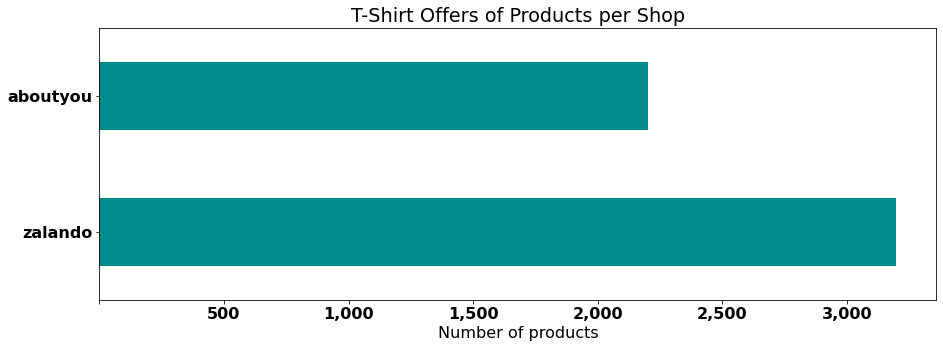

In [ ]:
#Visualisation: comparasion of specific item "T-Shirt" sum total in each shop

figure, ax = plt.subplots(figsize=(15, 5))
pd.value_counts(
    offers_training_df[
        offers_training_df['title'].str.lower().str.contains("t-shirt", na=False)
    ]['shop'],
    sort=True, ascending=False).plot.barh(color='darkcyan')
plt.title('T-Shirt Offers of Products per Shop')
xlabels = [f'{x:,}' for x in range(0, 3500, 500)]
plt.xticks(range(0, 3500, 500), xlabels)
plt.xlabel('Number of products')
plt.setp(ax.get_xticklabels()[0], visible=False)
plt.show()

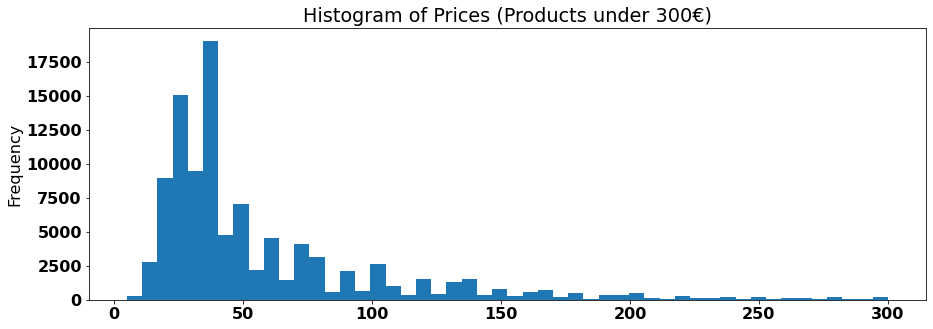

In [ ]:
figure, ax = plt.subplots(figsize=(15, 5))
plt.title('Histogram of Prices (Products under 300€)')
offers_training_df[
    offers_training_df['price'] < 300
]['price'].plot.hist(bins=50)
plt.show()

In [ ]:
# How many unique brands are in training dataset?
brands_training = offers_training_df['brand'].unique()
brands_training

array(['PIECES', 'LASCANA', 'MAMALICIOUS', 'rosemunde', 'Guess',
       'ELLESSE', 'Ellesse', 'Free People', 'BULLBOXER', 'Selected',
       'GUESS', 'Kaffe', 'Zizzi', 'JETTE', 'VERO MODA', 'QUIKSILVER',
       'Herrlicher', 'Pieces', 'Envie de Fraise', 'Saucony', 'AG Jeans',
       'Etam', 'MORE & MORE', 'SELECTED HOMME', 'JAKO', 'Panama Jack',
       'Rich & Royal', 'Fritzi aus Preußen', 'Gestuz', 'Vero Moda',
       'Bullboxer', 'PETITE FLEUR', 'LIU JO', 'Pieces Maternity',
       'JOLANA & FENENA', 'PEAK PERFORMANCE', 'ETAM', 'Colmar', 'Farah',
       'Swarovski', 'SELECTED FEMME', 'Denim Project', 'Mennace',
       'GARMENT PROJECT', 'Peak Performance', 'VIVANCE', 'Liu Jo',
       'PANAMA JACK', 'Mamalicious', 'VERBENAS', 'Selected Femme Petite',
       'Quiksilver', 'Cras', 'BREE', 'MOTHER', 'More & More', 'flip*flop',
       'Dockers', 'Libertine-Libertine', 'Vero Moda Curve',
       'Vero Moda Aware', 'Ted Baker', 'camano', 'Didriksons',
       'Club Monaco', 'Call it Spring', 

In [ ]:
# The top 5 unique brands on the list
brands_training[:5]

array(['PIECES', 'LASCANA', 'MAMALICIOUS', 'rosemunde', 'Guess'],
      dtype=object)

In [ ]:
#Total of 145 unique brands in training set
f'Number of unique brands in training: {len(brands_training):,}'

'Number of unique brands in training: 145'

In [ ]:
offers_test_df = pd.read_parquet('offers_test.parquet')

In [ ]:
#Testing set : Total product item numbers =106,741
f'Number of products in test: {len(offers_test_df):,}'

'Number of products in test: 106,741'

In [ ]:
# How many unique brands are in testing dataset?
brands_test = offers_test_df['brand'].unique()

In [ ]:
#Total of 164 unique brands in testing set
f'Number of unique brands in test: {len(brands_test):,}'

'Number of unique brands in test: 164'

###wordcloud training title ...

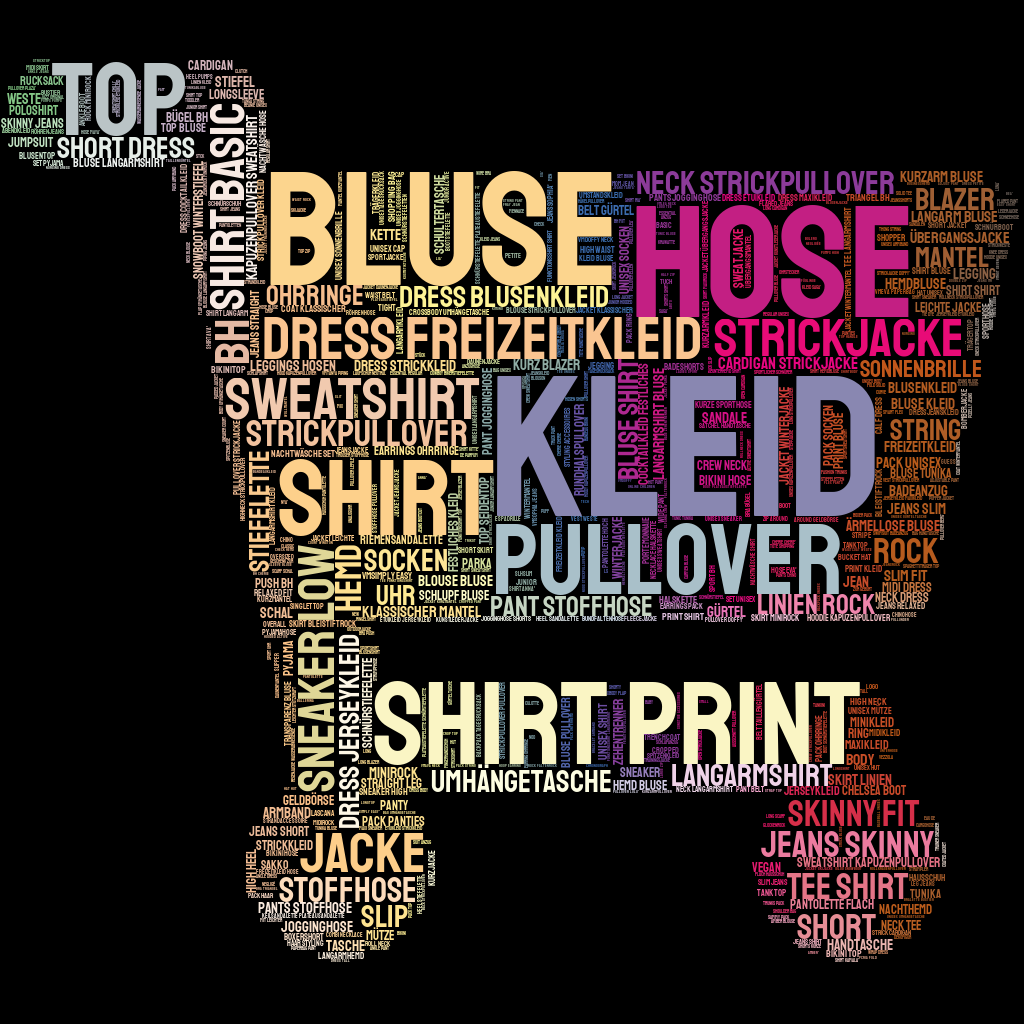

In [ ]:
import stylecloud
stylecloud.gen_stylecloud(text=' '.join(offers_training_df['title']),
                          icon_name='fas fa-shopping-cart',
                          palette='colorbrewer.qualitative.Accent_8',
                          background_color='black',
                          gradient='horizontal',
                          size=1024)

from IPython.display import Image
Image(filename="./stylecloud.png", width=604, height=604)

wordcloud testing title ...

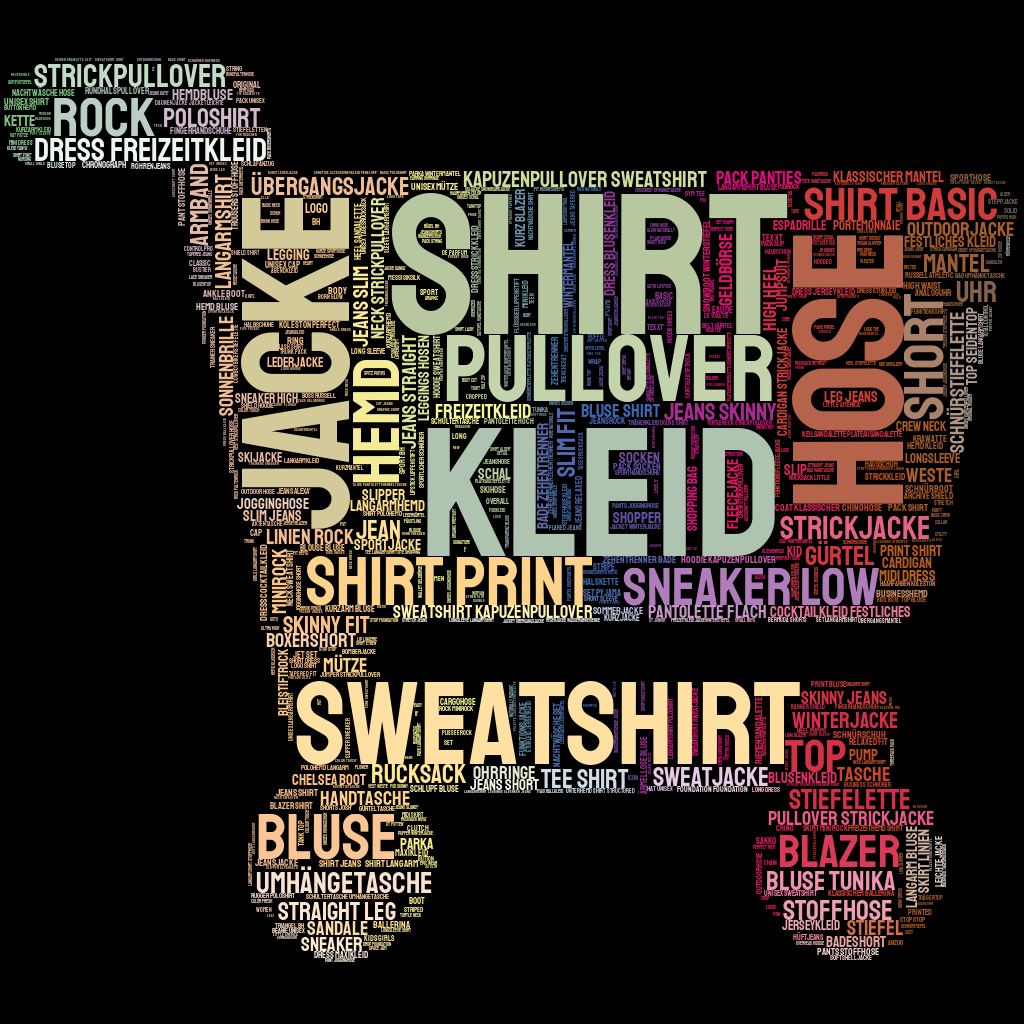

In [ ]:
stylecloud.gen_stylecloud(text=' '.join(offers_test_df['title']),
                          icon_name='fas fa-shopping-cart',
                          palette='colorbrewer.qualitative.Accent_8',
                          background_color='black',
                          gradient='horizontal',
                          size=1024)

from IPython.display import Image
Image(filename="./stylecloud.png", width=604, height=604)

**Note** that Brands in training and test are different!

In [ ]:
# Intersection between brands in training and test
f'Number of brands in train and test: {sum(np.in1d(brands_training, brands_test, assume_unique=True)):,}'

'Number of brands in train and test: 0'

### Matches -Example answer shall be like...

**Note** that matches for the offers in testing are hidden!

In [ ]:
matches_training_df = pd.read_parquet('matches_training.parquet')

In [ ]:
# Product matches number shall be ... 15,170

f'Number of groundtruth matches: {len(matches_training_df):,}'

'Number of groundtruth matches: 15,170'

In [ ]:
# matches on training set shall be look like ... this as top 5 matches
# Based on "offer_id"
matches_training_df.head()

,zalando,aboutyou,brand
0,b33f55d6-0149-4063-8b63-3eeae63562a2,ad5ceb87-0254-4171-b650-1d4d09f48efc,10
1,f04bef4a-f771-4749-914c-1b22718523b8,b68dd42a-9bda-46e2-aa4e-3d7c50881bb2,10
2,396c292a-cda8-4477-ac67-86701fc8ab95,7d19213c-b3ea-406a-ac8e-8299823c7bb4,10
3,e72b5d05-fd06-46e9-a183-5e2e26ed18bb,22344dcd-2eca-4576-a89d-916cc47f6cb4,10
4,87b7841b-f44e-4652-ace4-2ac975510226,c2f1a132-c013-4e78-8582-6d3001e05cbf,10


In [ ]:
matches_training_df[:10]

,zalando,aboutyou,brand
0,b33f55d6-0149-4063-8b63-3eeae63562a2,ad5ceb87-0254-4171-b650-1d4d09f48efc,10
1,f04bef4a-f771-4749-914c-1b22718523b8,b68dd42a-9bda-46e2-aa4e-3d7c50881bb2,10
2,396c292a-cda8-4477-ac67-86701fc8ab95,7d19213c-b3ea-406a-ac8e-8299823c7bb4,10
3,e72b5d05-fd06-46e9-a183-5e2e26ed18bb,22344dcd-2eca-4576-a89d-916cc47f6cb4,10
4,87b7841b-f44e-4652-ace4-2ac975510226,c2f1a132-c013-4e78-8582-6d3001e05cbf,10
5,86eab5f3-6254-4339-8abd-322a736c8824,4aae1500-274a-4ab0-b820-9ee88709f583,31
6,76ec7de0-f1f8-4ccf-ae87-f62b295dbfdf,b8a5f1eb-f85d-4509-bd28-52904f83803f,31
7,a91c95ab-8887-4f39-ade8-ed9d4217f670,68777769-75b9-4214-83a6-22b609d160d2,33
8,a549a54e-6742-4392-9d07-3696f885e3b4,a5e0929e-f273-40de-80ef-3b31f155c638,33
9,91893197-facc-45e5-87d6-afd472937eec,e420022c-5413-4498-a6a2-1ade58b77bc9,33


In [ ]:
#When looking up specific match item - first matched item in example
matches_training_df.iloc[0]

zalando     b33f55d6-0149-4063-8b63-3eeae63562a2
aboutyou    ad5ceb87-0254-4171-b650-1d4d09f48efc
brand       10                                  
Name: 0, dtype: object

In [ ]:
def get_offer(products, match, shop):
    return products[
        products['offer_id'] == match[shop]
    ].iloc[0]

In [ ]:
f"Number of unique brands in training matches: {len(offers_training_df['brand'].unique()):,}"

'Number of unique brands in training matches: 145'

In [ ]:
def plot_images(product):

    # Data
    images = product['image_urls']

    # Plot it!
    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(12, 4), dpi=100)

    if len(images) > 1:
        axes = axes.flatten()
        for i, axis in enumerate(axes):
            url = images[i]
            image = np.array(Image.open(urllib.request.urlopen(url)))
            axis.imshow(image)
            axis.axis('off')
    else:
        url = images[0]
        image = np.array(Image.open(urllib.request.urlopen(url)))
        axes.imshow(image)
        axes.axis('off')

    fig.tight_layout()
    plt.show()

In [ ]:
index = 9209 # particular index
product = get_offer(offers_training_df, matches_training_df.iloc[index], 'zalando')
product

offer_id       dbf70606-78ba-4f93-93af-4b6ecdf15006                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
shop           zalando                                                                                                                                                                                                                                                                                                 

Zalando


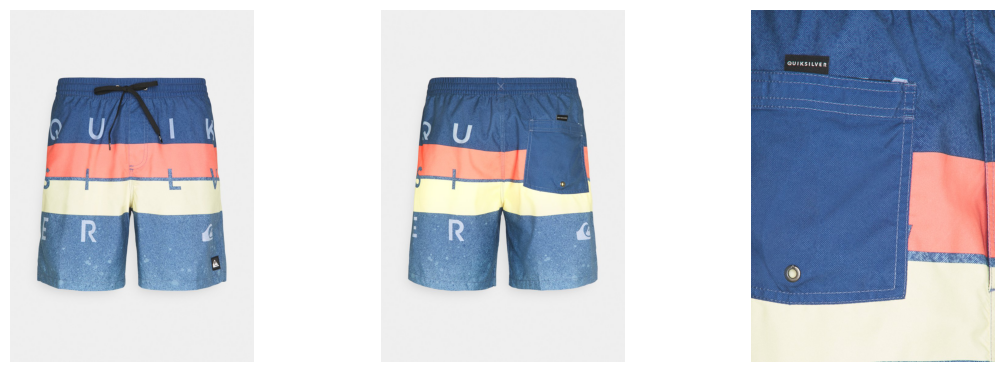

In [ ]:
print('Zalando')
plot_images(product)

In [ ]:
product = get_offer(offers_training_df, matches_training_df.iloc[index], 'aboutyou')
product

offer_id       d2accc74-68bd-4b06-88ff-8b9a42e20058                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

AboutYou


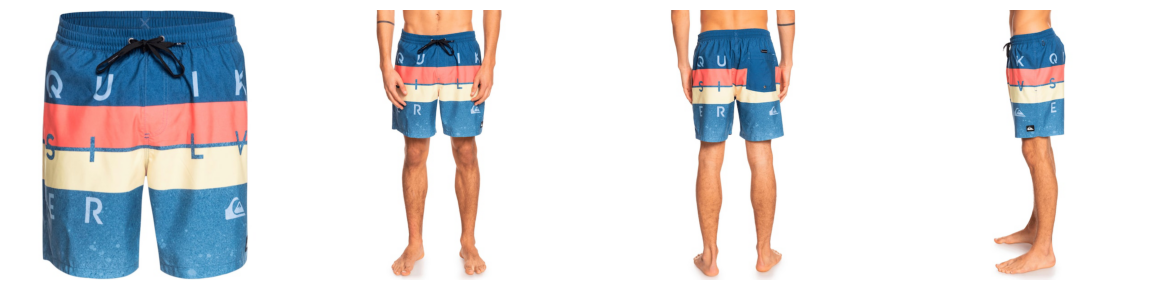

In [ ]:
print('AboutYou')
plot_images(product)

## Matching

The task is to predict the matches for the offers in testing making use of the offers in training and the corresponding groundtruth matches. Feel free to use any Machine Learning library you like such as Pytorch, TensorFlow or scikit-learn. An idea is to split the training data into train and validation to measure the generalizability of your approach. The following is just a slow and dummy algorithm to get you started just looking at a few brands.

**Note** that it might help map brands first between Zalando and AboutYou.

Get creative!

In [ ]:
def get_shops_for_brand(offers, brands):
    """ Get mapping for brands in between the two shops """

    mapping = {}
    for brand in brands:
        shops = offers[offers["brand"] == brand]["shop"].unique()
        for shop in shops:
            mapping.setdefault(shop, [])
            mapping[shop].append(brand)
        print(f'Brand: "{brand}" is in {", ".join(shops)}')
    return mapping

In [ ]:
def get_offers_by_shop(offers, mapping):
    """ Get offers per shop """

    offers_zal = offers[
        (offers['shop'] == 'zalando') &
        (offers['brand'].isin(mapping['zalando']))
    ]
    offers_comp = offers[
        (offers['shop'] == 'aboutyou') &
        (offers['brand'].isin(mapping['aboutyou']))
    ]
    return offers_zal, offers_comp

In [ ]:
def get_features(offers):
    """ Extract some text features using title and color """

    offers['text'] = offers[
        ['title','color']
    ].apply(lambda x : f"{x[0]} {x[1].split('|')[0]}", axis=1)

    return offers[['offer_id', 'text']].values

In [ ]:
def dummy_matcher(zal_offers, comp_offers, brand_block_index):
    """
    Slow and dummy matcher that matches each Zalando offer to an AboutYou offer
    Note: there is no need to match all offers as not all of them can be matched
    """

    # Get text from offers
    comp_text = comp_offers[:, 1]
    choices_dict = {idx: el for idx, el in enumerate(comp_text)}

    predicted_matches = []

    # For each zalando offer
    for zal_offer_id, zal_text in zal_offers:

        # Extract the best match using TheFuzz's package
        title, score, index = process.extractOne(zal_text, choices_dict)
        comp_offer_id = comp_offers[index][0]

        # Add predicted match
        predicted_matches.append(
            {
                'zalando': zal_offer_id,
                'aboutyou': comp_offer_id,
                'brand': brand_block_index
            }
        )

    return pd.DataFrame(predicted_matches)

In [ ]:
def get_brand_predictions(brand_pattern, brand_unique_index):
    """
    Custom pipeline to get the brand mapping, offers per shop, extract the features and generate predictions
    """

    list_brands = [
        brand
        for brand in brands_training
        if brand_pattern in brand.lower()
    ]

    # Get brand mapping
    brand_mapping = get_shops_for_brand(offers_training_df, list_brands)
    print(f'Mapping: {brand_mapping}')

    # Get offers
    brand_offers_zal, brand_offers_comp = get_offers_by_shop(offers_training_df, brand_mapping)

    print(f'Number of "{brand_pattern}" products: {len(brand_offers_zal) + len(brand_offers_comp):,} (' + \
          f'Zalando: {len(brand_offers_zal):,} ' + \
          f'and AboutYou: {len(brand_offers_comp):,})')

    # Get features
    brand_offers_zal_features = get_features(brand_offers_zal)
    brand_offers_comp_features = get_features(brand_offers_comp)

    # Match!
    predictions = dummy_matcher(
        brand_offers_zal_features,
        brand_offers_comp_features,
        brand_unique_index
    )

    print(f'Number of predicted matches for "{brand_pattern}": {len(predictions):,}')

    return brand_offers_zal, brand_offers_comp, predictions

In [ ]:
quiksilver_offers_zal, quiksilver_offers_comp, quiksilver_predicted_matches = get_brand_predictions('quiksilver', 0)

Brand: "QUIKSILVER" is in aboutyou
Brand: "Quiksilver" is in zalando
Mapping: {'aboutyou': ['QUIKSILVER'], 'zalando': ['Quiksilver']}
Number of "quiksilver" products: 847 (Zalando: 506 and AboutYou: 341)
Number of predicted matches for "quiksilver": 506


In [ ]:
veja_offers_zal, veja_offers_comp, veja_predicted_matches = get_brand_predictions('veja', 2)

Brand: "Veja" is in zalando, aboutyou
Mapping: {'zalando': ['Veja'], 'aboutyou': ['Veja']}
Number of "veja" products: 260 (Zalando: 243 and AboutYou: 17)
Number of predicted matches for "veja": 243


In [ ]:
burberry_offers_zal, burberry_offers_comp, burberry_predicted_matches = get_brand_predictions('burberry', 1)

Brand: "BURBERRY" is in aboutyou
Brand: "Burberry" is in zalando
Mapping: {'aboutyou': ['BURBERRY'], 'zalando': ['Burberry']}
Number of "burberry" products: 724 (Zalando: 110 and AboutYou: 614)
Number of predicted matches for "burberry": 110


### Pre-processing and matching -offers_test
Method 1:

In [ ]:
pip install string-grouper

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for sparse-dot-topn-for-blocks: filename=sparse_dot_topn_for_blocks-0.3.1.post3-cp37-cp37m-linux_x86_64.whl size=1765038 sha256=0920c6ee285ecefbf003a89da13358ed644afb71b8f5f1029d932de2ee4bcba9
  Stored in directory: /root/.cache/pip/wheels/b1/85/ec/cc535ffd28c568ccc7f7969f2a2b59b87676ff5819b437bc78
  Created wheel for topn: filename=topn-0.0.7-cp37-cp37m-linux_x86_64.whl size=1177701 sha256=0160f31dc94dcdc3d7be418575c59d5d664545d98edd39cbe08d5223a5a8bb66
  Stored in directory: /root/.cache/pip/wheels/ff/ae/11/24e76a3a7d2171b9165b74af01a0ff6c4e8134124652d0f1f1
Successfully built sparse-dot-topn-for-blocks topn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import gc
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.benchmark = True
from string_grouper import match_strings, match_most_similar, \
	group_similar_strings, compute_pairwise_similarities, \
	StringGrouper

In [ ]:
matches_test_df = pd.read_parquet('offers_test.parquet')
matches_test_df

,offer_id,shop,lang,brand,color,title,description,price,url,image_urls
0,67069c3c-46a7-45ea-ae0f-1cac2571ae68,aboutyou,de,DKNY,beige | Beige,Schal,"{""Marke"": [""DKNY""], ""Gr\u00f6\u00dfenlauf"": [""Unisex - Onesize (Onesize, Onesize, Einheitsgr\u00f6\u00dfe, 1)""], ""Detailfarbe"": [""beige""], ""Suchfarbe"": [""Beige""], ""Assortment Type"": [""Second Hand""], ""Zustand"": [""Mit Sch\u00f6nheitsfehlern""], ""Kategorieattribut"": [""Schal""], ""Versand durch"": [""Carou""], ""Substilgruppe"": [""Regular Second Hand""], ""Zustand \u2013 Mit Sch\u00f6nheitsfehlern"": [""Der Artikel wurde getragen und hat sichtbare Gebrauchsspuren.""], ""Second Hand Type"": [""Regular Second Hand""], ""Gebraucht"": true, ""Ausrichtung Marke"": [""Premium""], ""Geschlecht"": [""Frauen""], ""Quick Filter Style Group"": [""Premium""], ""Gr\u00f6\u00dfe"": [""Unisex - Onesize (Onesize, Onesize, Einheitsgr\u00f6\u00dfe, 1)""], ""Display Colors"": [""beige""], ""Style group"": [""premium""], ""Brand logo"": [""DKNY""], ""Name"": [""Schal""], ""Description"": [""""]}",49.990000,https://www.aboutyou.de/p/dkny/schal-7221536,"[https://cdn.aboutstatic.com/file/images/d84322132c044ee5c283f954a1be1269.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/254abcf31f149239d0ffac5cc7bf1d0b.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/98034e4993801e489917f6bdaee1d3d5.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/8064073408854d801ef64433e33a47e8.JPG?width=600&height=800&quality=0.90]"
1,c065bcd3-0669-4061-b1ce-fd6467f81b91,aboutyou,de,MICHAEL Michael Kors,schwarz | Mischfarben,Plisseerock,"{""Marke"": [""MICHAEL Michael Kors""], ""Gr\u00f6\u00dfenlauf"": [""Damen - Konf. D""], ""Suchfarbe"": [""Mischfarben""], ""Assortment Type"": [""Second Hand""], ""Zustand"": [""Wie neu""], ""Kategorieattribut"": [""Faltenr\u00f6cke""], ""Versand durch"": [""Carou""], ""Detailfarbe"": [""schwarz""], ""Ausrichtung Marke"": [""Premium""], ""Substilgruppe"": [""Regular Second Hand""], ""Zustand \u2013 Wie neu"": [""Der Artikel wurde nicht getragen, sondern h\u00f6chstens anprobiert. Manche dieser Artikel tragen noch ihr Etikett.""], ""Vendorsizerun-Label"": [""Deutsche Konfektion""], ""Second Hand Type"": [""Regular Second Hand""], ""Gebraucht"": true, ""Geschlecht"": [""Frauen""], ""Size Chart"": [""female bottoms""], ""Size Advisor"": true, ""Gr\u00f6\u00dfe"": [""def_female_int""], ""Sondergr\u00f6\u00dfen f\u00fcr Kategoriezuordnung"": [""Kleine Cups""], ""Brand logo"": [""MICHAEL Michael Kors""], ""Name"": [""Plisseerock""], ""Description"": [""""]}",79.980000,https://www.aboutyou.de/p/michael-michael-kors/plisseerock-7213763,"[https://cdn.aboutstatic.com/file/images/687cdafa2c8d31bd1b539fc3b12ec38d.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/1e9fbbf39971e5dc414afdfb59c6b26d.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/7544e2390336b118bee8c73dd65934d7.JPG?width=600&height=800&quality=0.90, https://cdn.aboutstatic.com/file/images/501506459062ba15bb99f8b1d9046fd1.JPG?width=600&height=800&quality=0.90]"
2,7dfb8ecf-ba37-42dc-9287-78bac2b0e192,aboutyou,de,MICHAEL Michael Kors,hellbraun | mokka | Braun,Tasche,"{""Zielgruppe"": [""Female""], ""Gr\u00f6\u00dfe (Volumen)"": [""Klein (< 25 l)""], ""Gurt-/Henkell\u00e4nge"": [""Kurzer Trageriemen / Henkel""], ""Marke"": [""MICHAEL Michael Kors""], ""Material"": [""Lederimitat""], ""Verschlussart"": [""Druckknopf""], ""Ausrichtung Marke"": [""Premium""], ""Suchfarbe"": [""Braun""], ""Gr\u00f6\u00dfenlauf"": [""Unisex - Onesize (Onesize, Onesize, Einheitsgr\u00f6\u00dfe, 1)""], ""Detailfarbe"": [""hellbraun"", ""mokka""], ""Ordersaison"": [""HW 21""], ""Muster"": [""Logoprint""], ""Business"": [""Freizeit""], ""Design"": [""Ger\u00e4umiges Hauptfach"", ""Rei\u00dfverschluss"", ""Rei\u00dfverschlussfach innen""], ""Extras"": [""Metall\u00f6sen"", ""Robuster Stoff"", ""All-Over-M

In [ ]:
testing70=matches_test_df[:74718]

In [ ]:
testing70.shape

(74718, 10)

In [ ]:
## Remove punctuation and meaningless characters
import re
def preprocess(description):
  # Actually not required as what we have is titles which usually doesn't contain words that we use for general communication.
    description=description.lower()
    description=re.sub('[-\n\t]+',' ',description)
    description= re.sub(r"won\'t", "will not",description)
    description=re.sub(r"can\'t", "can not",description)
    description=re.sub(r"n\'t", " not",description)
    description=re.sub(r"\'re", " are",description)
    description=re.sub(r"\'s", " is",description)
    description=re.sub(r"\'d", " would",description)
    description=re.sub(r"\'ll", " will",description)
    description=re.sub(r"\'t", " not",description)
    description=re.sub(r"\'ve", " have",description)
    description=re.sub(r"\'m", " am",description)
    description=re.sub('[^a-z0-9]+',' ',description)
    description=re.sub('\s+',' ',description)
    return description.strip()

In [ ]:
clensed_train=[preprocess(title) for title in tqdm(testing70.title.values)]

100%|██████████| 74718/74718 [00:01<00:00, 59850.23it/s]


In [ ]:
#Cleaned data that is ready for training
clensed_train

['schal',
 'plisseerock',
 'tasche',
 'winterjacke ashani puffy',
 'averie shorts stoffhose',
 'sweatshirt holly',
 'kabukipinsel nothe essential kabuki',
 'blouse solid with tape detail bluse',
 'sneaker is serendipity',
 'shorts',
 'breaker pants jogginghose',
 'shortsleeve workwear jumpsuit',
 'kleid iserena',
 'rucksack pop quiz',
 'uhr',
 'strickjacke emmarie',
 'hemd east',
 'uhr',
 'new duty short parka',
 'faith uhr',
 'skirt minirock a linien rock',
 'crop tee t shirt basic',
 'jacke hydro hooded',
 'rucksack',
 'sequin logo crewneck fleecepullover',
 'kleid',
 'yasally ankle dress maxikleid',
 'hose',
 'schn rschuhe',
 'sweatjacke kenia marina',
 'lola pantolette flach hausschuh',
 'simone playsuit jumpsuit',
 'kleid nata',
 'jacke',
 'sportmantel bandis',
 'kleid',
 'hose wouldachibi',
 'stoffhose',
 'bronson high skinny chino wmn jeans slim fit',
 'smart travelbag mini unikko bag umh ngetasche',
 'kids girls jogginghose',
 'cargo shorts',
 'half zip sweatshirt',
 'bronson b

In [ ]:
%%time
tfidf=TfidfVectorizer()
embedded_train=tfidf.fit_transform(clensed_train).toarray()
embedded_train.shape

CPU times: user 725 ms, sys: 3.95 s, total: 4.68 s
Wall time: 4.66 s


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()
# Standard output is '/device:GPU:0'

In [ ]:
embedded_train=torch.from_numpy(embedded_train)
embedded_train=embedded_train.cuda()

In [ ]:
matches=[]
chunksize=512
chunks=len(testing70)//chunksize if len(testing70)%chunksize==0 else (len(testing70)//chunksize)+1
for chunk in tqdm(range(chunks)):
    start=chunk*chunksize
    end=min(len(testing70),start+chunksize)
    cossim=torch.matmul(embedded_train,embedded_train[start:end].T).T
    cossim=cossim.data.cpu().numpy()
    for per_posting in cossim:
        indices=np.where(per_posting>=0.65)[0]
        match=testing70.iloc[indices].offer_id.values
        if len(match.tolist())>50:
            ind=np.where(per_posting>=sorted(per_posting)[-50])[0]
            match=testing70.iloc[ind].offer_id.values
        matches.append(' '.join(match.tolist()))

100%|██████████| 146/146 [12:04<00:00,  4.96s/it]


In [ ]:
testing70['matches']=matches


In [ ]:
submission=testing70[['offer_id','matches','shop']]
submission.head()

offer_id  \
0  67069c3c-46a7-45ea-ae0f-1cac2571ae68   
1  c065bcd3-0669-4061-b1ce-fd6467f81b91   
2  7dfb8ecf-ba37-42dc-9287-78bac2b0e192   
3  5f42a01e-32e0-4e96-9434-4c2faf4346d1   
4  649b7eeb-30be-4bee-9b45-b01f378ba11a   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

##Method 2 - TFIDF
Based on titles


In [ ]:
import pandas as pd
import numpy as np
from string_grouper import match_strings, match_most_similar, \
	group_similar_strings, compute_pairwise_similarities, \
	StringGrouper

In [ ]:
#offers testing set
testing70.shape

(74718, 11)

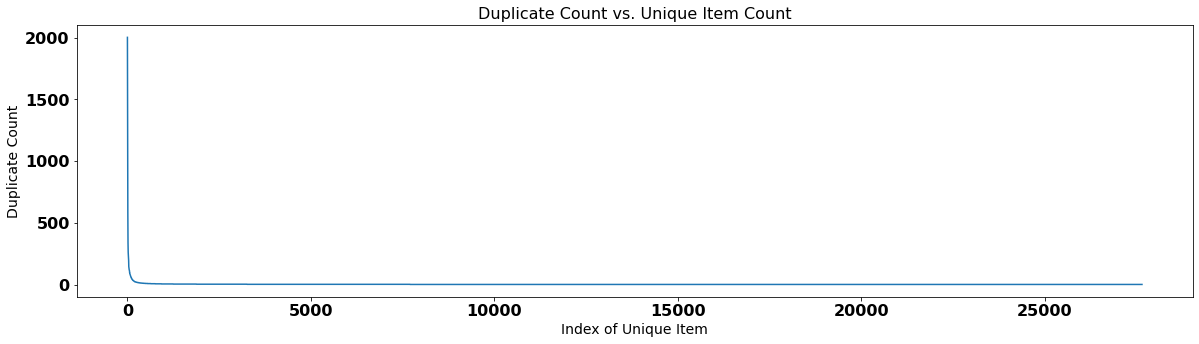

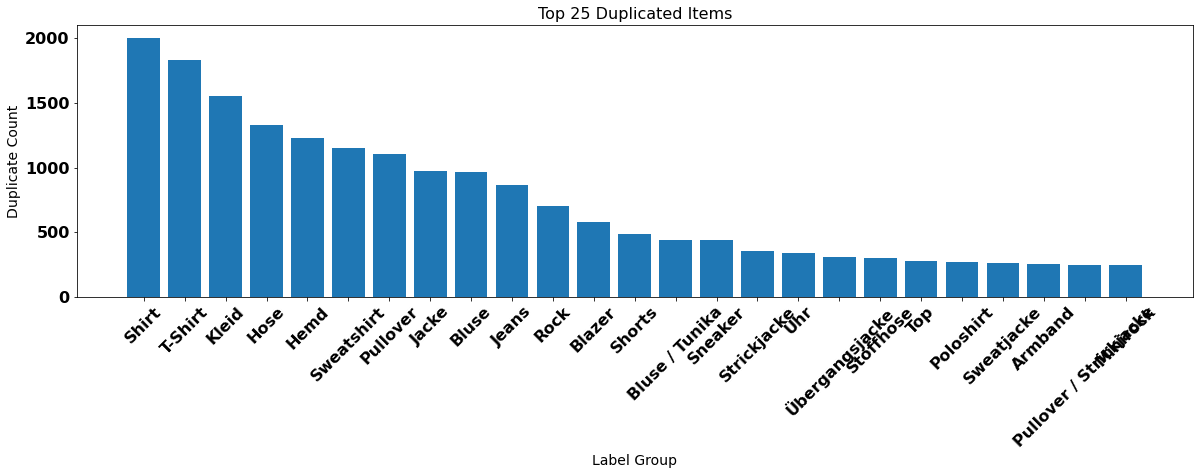

In [ ]:
groups = testing70.title.value_counts()
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(groups)),groups.values)
plt.ylabel('Duplicate Count',size=14)
plt.xlabel('Index of Unique Item',size=14)
plt.title('Duplicate Count vs. Unique Item Count',size=16)
plt.show()

plt.figure(figsize=(20,5))
plt.bar(groups.index.values[:25].astype('str'),groups.values[:25])
plt.xticks(rotation = 45)
plt.ylabel('Duplicate Count',size=14)
plt.xlabel('Label Group',size=14)
plt.title('Top 25 Duplicated Items',size=16)
plt.show()

In [ ]:
###TOP 5 duplicated products
for k in range(5):
    print('#'*40)
    print('### TOP %i DUPLICATED ITEM:'%(k+1),groups.index[k])
    print('#'*40)
    top = testing70.loc[testing70.title==groups.index[k]]

########################################
### TOP 1 DUPLICATED ITEM: Shirt
########################################
########################################
### TOP 2 DUPLICATED ITEM: T-Shirt
########################################
########################################
### TOP 3 DUPLICATED ITEM: Kleid
########################################
########################################
### TOP 4 DUPLICATED ITEM: Hose
########################################
########################################
### TOP 5 DUPLICATED ITEM: Hemd
########################################


In [ ]:
# Cleaning data
import re

def ngrams(string, n=3):
    string = re.sub(r'[,-./]|\sBD',r'', string)
    string=re.sub('[-\n\t]+',' ',string)
    string= re.sub(r"won\'t", "will not",string)
    string=re.sub(r"can\'t", "can not",string)
    string=re.sub(r"n\'t", " not",string)
    string=re.sub(r"\'re", " are",string)
    string=re.sub(r"\'s", " is",string)
    string=re.sub(r"\'d", " would",string)
    string=re.sub(r"\'ll", " will",string)
    string=re.sub(r"\'t", " not",string)
    string=re.sub(r"\'ve", " have",string)
    string=re.sub(r"\'m", " am",string)
    string=re.sub('[^a-z0-9]+',' ',string)
    string=re.sub('\s+',' ',string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

In [ ]:
##ADDed

from sklearn.feature_extraction.text import TfidfVectorizer

P_names = testing70['title']
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams)
tf_idf_matrix = vectorizer.fit_transform(P_names)

In [ ]:
#cosine
import numpy as np
from scipy.sparse import csr_matrix
import sparse_dot_topn.sparse_dot_topn as ct

def awesome_cossim_top(A, B, ntop, lower_bound=0):
    # force A and B as a CSR matrix.
    # If they have already been CSR, there is no overhead
    A = A.tocsr()
    B = B.tocsr()
    M, _ = A.shape
    _, N = B.shape

    idx_dtype = np.int32

    nnz_max = M*ntop

    indptr = np.zeros(M+1, dtype=idx_dtype)
    indices = np.zeros(nnz_max, dtype=idx_dtype)
    data = np.zeros(nnz_max, dtype=A.dtype)

    ct.sparse_dot_topn(
        M, N, np.asarray(A.indptr, dtype=idx_dtype),
        np.asarray(A.indices, dtype=idx_dtype),
        A.data,
        np.asarray(B.indptr, dtype=idx_dtype),
        np.asarray(B.indices, dtype=idx_dtype),
        B.data,
        ntop,
        lower_bound,
        indptr, indices, data)

    return csr_matrix((data,indices,indptr),shape=(M,N))

In [ ]:
import time
t1 = time.time()
matches = awesome_cossim_top(tf_idf_matrix, tf_idf_matrix.transpose(), 10, 0.8)
t = time.time()-t1
print("SELFTIMED:", t)

SELFTIMED: 14.779923677444458


In [ ]:
def get_matches_df(sparse_matrix, name_vector, top=100):
    non_zeros = sparse_matrix.nonzero()

    sparserows = non_zeros[0]
    sparsecols = non_zeros[1]

    if top:
        nr_matches = top
    else:
        nr_matches = sparsecols.size

    left_side = np.empty([nr_matches], dtype=object)
    right_side = np.empty([nr_matches], dtype=object)
    similairity = np.zeros(nr_matches)
    shop = np.empty([nr_matches], dtype=object)

    for index in range(0, nr_matches):
        left_side[index] = name_vector[sparserows[index]]
        right_side[index] = name_vector[sparsecols[index]]
        similairity[index] = sparse_matrix.data[index]



    return pd.DataFrame({'left_side': left_side,
                          'right_side': right_side,
                           'similairity': similairity,

                           })

In [ ]:
matches_df = get_matches_df(matches, P_names, top=100000)
matches_df = matches_df[matches_df['similairity'] < 0.99999]
# Remove all exact matches
matches_df.sample(20)

,left_side,right_side,similairity
22203,Cardigan 'MATER',Cardigan,0.920155
30972,Winterparka 'Canny',Winterparka 'KRISTOF',0.817055
444,6 PACK Socken,MIXED BEAR DESIGN 6 PACK UNISEX Socken,0.854252
286,Hose 'Dachibi',Sport-Hose 'Dachibi',0.890161
46469,S GINN HOOD C4 Kapuzenpullover Sweatshirt,HOODIE Kapuzenpullover Sweatshirt,0.872353
76657,Shirt 'Paule 1',Poloshirt 'Paule 1',0.856674
69285,AUSTEN Espadrille Keilsandalette Plateausandalette,BIARRITZ Keilsandalette Plateausandalette Espadrille,0.958147
37060,Clogs,Clogs 'WILLOW FLAT',0.891537
82449,Shirts '3301',Jeans '3301',0.810484
50527,Overall 'GEESA',Overall,0.898706


In [ ]:
matches_df

,left_side,right_side,similairity
31,Winterjacke 'Ashani Puffy',Wintermantel 'Ashani Puffy',0.801097
37,Sweatshirt 'Holly',T-Shirt 'Solly',0.836829
38,Sweatshirt 'Holly',Shirt 'Solly',0.836829
96,Rucksack 'Pop Quiz',Pop Quiz Rucksack,0.881930
241,LOLA Pantolette flach Hausschuh,HARBOR Hausschuh Pantolette flach,0.943949
...,...,...,...
99911,Bikinitop 'HELLEN',Bikinitop,0.948897
99912,Bikinitop 'HELLEN',Bikinitop,0.948897
99913,Bikinitop 'HELLEN',Bikinitop,0.948897
99983,Badeshorts 'Octopus',Badeshort 'Octopus',0.859931


In [ ]:
matches_df.sort_values(['similairity'], ascending=False).head(10)

,left_side,right_side,similairity
23386,Concealer 'Can't Stop Won't Stop',Concealer Can't Stop Won't Stop,0.991327
671,LOUISA High Heel Sandalette Keilsandalette Plateausandalette,PRUE WEDGE Keilsandalette Plateausandalette High Heel Sandalette,0.988736
17402,KATYAA Keilsandalette Plateausandalette High Heel Sandalette,LOUISA High Heel Sandalette Keilsandalette Plateausandalette,0.988736
17404,KATYAA Keilsandalette Plateausandalette High Heel Sandalette,High Heel Sandalette Keilsandalette Plateausandalette,0.988736
17403,KATYAA Keilsandalette Plateausandalette High Heel Sandalette,High Heel Sandalette Keilsandalette Plateausandalette,0.988736
17405,KATYAA Keilsandalette Plateausandalette High Heel Sandalette,LOUISA High Heel Sandalette Keilsandalette Plateausandalette,0.988736
17406,KATYAA Keilsandalette Plateausandalette High Heel Sandalette,LOUISA High Heel Sandalette Keilsandalette Plateausandalette,0.988736
85198,Sportunterwäsche,Sportunterwäsche 'IVESDALE',0.983543
61785,Schlafshirt 'EMELIE',Schlafshirt,0.982200
61789,Schlafshirt 'EMELIE',Schlafshirt,0.982200


In [ ]:
matches_df.to_parquet('/content/drive/MyDrive/assignment/assignment/testing_prediction.parquet')

0        67069c3c-46a7-45ea-ae0f-1cac2571ae68 b6f5c9c7-eb12-4ed1-ac86-8d15c7b0f5aa 897894f1-17c3-4e1a-bc79-c2c527d421f6 3f6107ed-a262-43a7-82a2-7ea7ce6a685c a7950442-3db1-4661-b6a0-2568e779c0f9 e7a3a8bd-3713-483f-b7e8-32980725f2f2 6cd72b8f-7a7d-414c-960f-3c169204e92e b9120334-c2be-4de9-aeff-c10db7dec083 14b59c00-a0be-4d5b-b410-a99fa5486492 1d860c54-7504-4ce5-a1d0-a60afa0426ed 078c4bbe-c3e5-4ddc-b203-0e20e1ba1366 0f263164-05d1-48d2-9989-6b24d242c46b 063c5382-29b3-4892-bb43-e026d82a916b 454ea696-cab5-4cc5-8496-4ac6835f308f 81b3120d-ee8d-4bcb-bf16-3b8ef940312a 7f88d961-4f55-4773-9abf-e7f57a4cd35a b7d9e87f-5dd9-415e-8ea2-9b2a3e52085c dce6da68-4519-46d6-8ca9-37f781164231 68f563e4-d6a4-43d3-8e2c-c747c2af138d aa870648-47b9-48a4-af6e-ba7c99e2b892 e1705665-b773-4f68-9837-2410ce2f13bb 18c8f8f8-3b07-4e19-8ada-c63d5fbb8a4b 20da9f74-c5e8-48fd-9454-5c238f633d55 5a7a0fbf-df27-418e-bb3e-27017aec2ca6 1bb41625-9474-412b-aab3-e5ef163b12df 216ff7a7-a93e-4b42-b727-311a9810fe2e 32826e41-1aea-4074-8351-78740

## Evaluation

Now that we just learned some mapping between the offers and the matches, we can evaluate the performance of our matching algorithm. In a qualitative way, we can explore the matches using the actual images as we can quickly figure out whether that is actually a match or not. In a quantitative manner, we can measure its performance leveraging F1, precision and recall metrics after calculating the confusion matrix between actual matches and the predicted ones.

The goal of the assignment is to maximize F1 overall!

In [ ]:
def explore_match(match):
    """ Explore a match with the offers' images """

    # get offer ids
    zal_offer_id = match['zalando']
    comp_offer_id = match['aboutyou']

    # get offers
    zalando_offer = offers_training_df[offers_training_df['offer_id'] == zal_offer_id].iloc[0]
    comp_offer = offers_training_df[offers_training_df['offer_id'] == comp_offer_id].iloc[0]

    # show images and text
    print(f"Zalando: {zalando_offer['title']} {zalando_offer['color']}")
    plot_images(zalando_offer)
    print(f"AboutYou: {comp_offer['title']} {zalando_offer['color']}")
    plot_images(comp_offer)

In [ ]:
def get_true_matches_brand(zal_offers):
    """ Get true matches based on their brand block """

    # get brand block / mapping index from the training matches
    indexes = zal_offers.merge(
        matches_training_df,
        left_on='offer_id',
        right_on='zalando',
        suffixes=['offer', 'match']
    )['brandmatch'].unique()

    return matches_training_df[matches_training_df['brand'].isin(indexes)]

In [ ]:
def get_metrics(true_matches, predicted_matches, offers_comp):
    """ Calculate performance metrics """

    # True Positives
    TP = len(
        true_matches.merge(
            predicted_matches,
            on=['zalando', 'aboutyou'],
            how='inner',
        )
    )

    # False Negatives
    FN = len(true_matches) - TP

    # Actual Positives
    positives = len(true_matches)
    assert positives == TP + FN

    # Actual Negatives (with respect to the competitor)
    negatives = len(offers_comp) - positives

    # Actual negative values (with respect to the competitor)
    offers_comp_with_matches = offers_comp.merge(
        true_matches,
        left_on='offer_id',
        right_on='aboutyou',
        how='outer',
        indicator=True
    )
    negative_values = offers_comp_with_matches[
        offers_comp_with_matches['_merge'] == 'left_only'
    ]['offer_id'].unique()

    assert negatives == len(negative_values)

    # Competitor predictions
    comp_preds = predicted_matches['aboutyou'].unique()

    # False Negatives (with respect to the competitor)
    FP = len(np.intersect1d(negative_values, comp_preds))

    # True Negatives
    TN = negatives - FP

    # Precision, Recall and F1 metrics
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = 0
    if precision + recall > 0:
        F1 = 2 * precision * recall / (precision + recall)

    metrics = dict(
        TP=TP,
        FN=FN,
        FP=FP,
        TN=TN,
        positives=positives,
        negatives=negatives,
        precision=precision,
        recall=recall,
        F1=F1,
    )

    return metrics

In [ ]:
def get_brand_metrics(brand_offers_zal, brand_offers_comp, brand_predicted_matches):

    # Get groundtruth
    brand_true_matches = get_true_matches_brand(brand_offers_zal)

    print(f'Number of true matches: {len(brand_true_matches):,}')

    # Get metrics
    brand_metrics = get_metrics(brand_true_matches, brand_predicted_matches, brand_offers_comp)

    return brand_true_matches, brand_metrics

Zalando: SYCAMORE Skijacke Snowboardjacke oliv


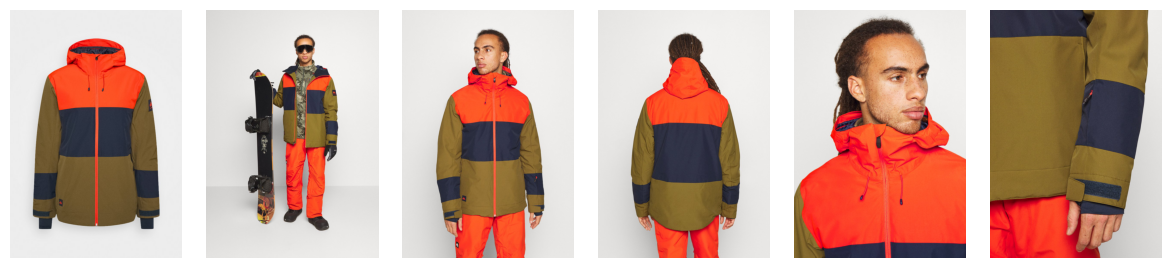

AboutYou: Jacke oliv


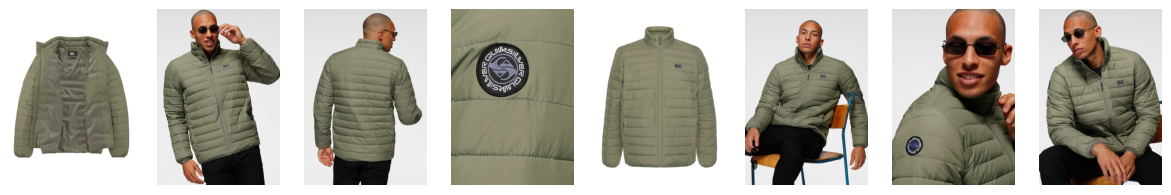

In [ ]:
# Explore a particular predicted match
predicted_match = quiksilver_predicted_matches.iloc[27]
explore_match(predicted_match)

Not a correct match!

Let's see some details:

In [ ]:
get_offer(offers_training_df, predicted_match, 'zalando')

offer_id       7d779be3-68b5-4a3f-b7cf-b19d31c48f7d                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
get_offer(offers_training_df, predicted_match, 'aboutyou')

offer_id       dde31094-36ef-4d98-abfc-12f46652f24e                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Zalando: SYCAMORE Skijacke Snowboardjacke oliv


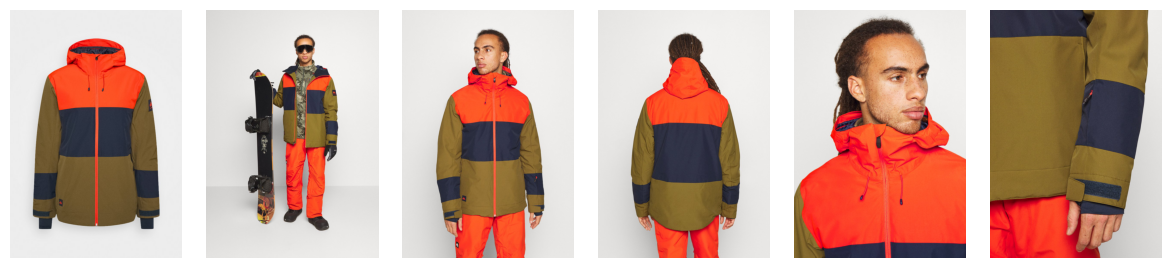

AboutYou: Skijacke oliv


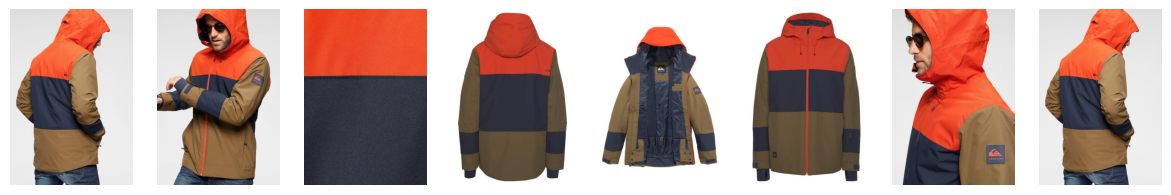

In [ ]:
# Groundtruth match (note: there is a true match for this particular offer)
true_match = matches_training_df[
    matches_training_df['zalando'] == quiksilver_predicted_matches.iloc[27]['zalando']
].iloc[0]
explore_match(true_match)

In [ ]:
quiksilver_true_matches, quiksilver_metrics = get_brand_metrics(
    quiksilver_offers_zal, quiksilver_offers_comp, quiksilver_predicted_matches)
quiksilver_metrics

Number of true matches: 98


{'F1': 0.1234567901234568,
 'FN': 88,
 'FP': 54,
 'TN': 189,
 'TP': 10,
 'negatives': 243,
 'positives': 98,
 'precision': 0.15625,
 'recall': 0.10204081632653061}

In [ ]:
matches_df

,left_side,right_side,similairity
31,Winterjacke 'Ashani Puffy',Wintermantel 'Ashani Puffy',0.801097
37,Sweatshirt 'Holly',T-Shirt 'Solly',0.836829
38,Sweatshirt 'Holly',Shirt 'Solly',0.836829
96,Rucksack 'Pop Quiz',Pop Quiz Rucksack,0.881930
241,LOLA Pantolette flach Hausschuh,HARBOR Hausschuh Pantolette flach,0.943949
...,...,...,...
99911,Bikinitop 'HELLEN',Bikinitop,0.948897
99912,Bikinitop 'HELLEN',Bikinitop,0.948897
99913,Bikinitop 'HELLEN',Bikinitop,0.948897
99983,Badeshorts 'Octopus',Badeshort 'Octopus',0.859931


Let's look at some of these results!

For Quiksilver, we figured out 10 matches, true positives, out of the 98 actual matches (positives) by just using the title and color of the offers. Hence, 88 were false negatives, we failed to predict them as matches. In terms of the actual negatives, there were 243 offers in AboutYou that did not have a corresponding match. We predicted 54 of those to have a match but in reality they did not any, those are our false positives. The rest are correct true negatives.

In [ ]:
burberry_true_matches, burberry_metrics = get_brand_metrics(
    burberry_offers_zal, burberry_offers_comp, burberry_predicted_matches)
burberry_metrics

Number of true matches: 45


{'F1': 0.10169491525423728,
 'FN': 42,
 'FP': 11,
 'TN': 558,
 'TP': 3,
 'negatives': 569,
 'positives': 45,
 'precision': 0.21428571428571427,
 'recall': 0.06666666666666667}

In [ ]:
veja_true_matches, veja_metrics = get_brand_metrics(veja_offers_zal, veja_offers_comp, veja_predicted_matches)
veja_metrics

Number of true matches: 14


{'F1': 0.38095238095238093,
 'FN': 10,
 'FP': 3,
 'TN': 0,
 'TP': 4,
 'negatives': 3,
 'positives': 14,
 'precision': 0.5714285714285714,
 'recall': 0.2857142857142857}

Let's measure our metrics over all the offers in the groundtruth. Note that there is no need to perform predictions per brand block, it is just an approach used in this notebook to showcase matches and not matches

In [ ]:
offers_zal = submission[submission['shop'] == 'zalando']
offers_comp = submission[submission['shop'] == 'aboutyou']

In [ ]:
predicted_matches = pd.concat([
    quiksilver_predicted_matches,
    burberry_predicted_matches,
    veja_predicted_matches
])

In [ ]:
matches_training_df

,zalando,aboutyou,brand
0,b33f55d6-0149-4063-8b63-3eeae63562a2,ad5ceb87-0254-4171-b650-1d4d09f48efc,10
1,f04bef4a-f771-4749-914c-1b22718523b8,b68dd42a-9bda-46e2-aa4e-3d7c50881bb2,10
2,396c292a-cda8-4477-ac67-86701fc8ab95,7d19213c-b3ea-406a-ac8e-8299823c7bb4,10
3,e72b5d05-fd06-46e9-a183-5e2e26ed18bb,22344dcd-2eca-4576-a89d-916cc47f6cb4,10
4,87b7841b-f44e-4652-ace4-2ac975510226,c2f1a132-c013-4e78-8582-6d3001e05cbf,10
...,...,...,...
15165,29ffe4d1-c298-473c-a6da-b568e2a828c0,c0595145-bf4c-4d86-86e1-dfb4b07da767,77
15166,b5c8c045-0185-4515-95f9-ad10a65026fc,d515e41e-f680-45e1-a029-0650ac8cf20e,77
15167,cd874fd4-a2d6-4e02-a5b5-514f68148027,4ab54165-938d-43df-9f3e-48da066c873d,77
15168,92a6d277-d460-42c5-bc12-343dd800f40a,8992e0b1-3a27-4e3e-be9a-42c014826a38,77


## Submission

Prepare a submission for matching the test offers between Zalando and AboutYou. The following example makes predictions for just a few brand blocks that are identified from the test offers. The objective is to make predictions for all test offers. Remember not all of them will have matches!

Happy Hacking!

In [ ]:
dkny_brands = [
    brand
    for brand in brands_test
    if 'dkny' in brand.lower()
]

dkny_brand_mapping = get_shops_for_brand(offers_test_df, dkny_brands)
dkny_brand_mapping

Brand: "DKNY" is in aboutyou, zalando
Brand: "DKNY Performance" is in aboutyou
Brand: "DKNY Intimates" is in aboutyou
Brand: "DKNY Sport" is in aboutyou


{'aboutyou': ['DKNY', 'DKNY Performance', 'DKNY Intimates', 'DKNY Sport'],
 'zalando': ['DKNY']}

In [ ]:
gant_brands = [
    brand
    for brand in brands_test
    if 'gant' in brand.lower()
]

gant_brand_mapping = get_shops_for_brand(offers_test_df, gant_brands)
gant_brand_mapping

Brand: "GANT" is in aboutyou
Brand: "Gant" is in zalando


{'aboutyou': ['GANT'], 'zalando': ['Gant']}

In [ ]:
# Brand mappings for brands in test offers
test_mapping = [
    dkny_brand_mapping,
    gant_brand_mapping
]

In [ ]:
def get_test_predictions(mapping):
    """ Predicts brands per block for the test set """

    predictions = []

    for brand_index, brand_mapping in enumerate(mapping):

        print(f'Predicting for block {", ".join(list(chain.from_iterable(brand_mapping.values())))}...')

        # Get offers
        brand_offers_zal, brand_offers_comp = get_offers_by_shop(offers_test_df, brand_mapping)
        print(f'Number of offers: {len(brand_offers_zal) + len(brand_offers_comp):,}')

        # Get features
        brand_offers_zal_features = get_features(brand_offers_zal)
        brand_offers_comp_features = get_features(brand_offers_comp)

        # Match!
        brand_pred_matches = dummy_matcher(
            brand_offers_zal_features,
            brand_offers_comp_features,
            brand_index
        )
        print(f'Number of matches: {len(brand_pred_matches):,}')

        # Add the predictions
        predictions.append(brand_pred_matches)

    return pd.concat(predictions)

In [ ]:
predictions_df = get_test_predictions(test_mapping)

Predicting for block DKNY, DKNY Performance, DKNY Intimates, DKNY Sport, DKNY...
Number of offers: 2,079
Number of matches: 932
Predicting for block GANT, Gant...
Number of offers: 3,608


KeyboardInterrupt: ignored

In [ ]:
submission.to_parquet('/content/drive/MyDrive/assignment/assignment/testing_prediction1.parquet')

In [ ]:
testing70.to_parquet('/content/drive/MyDrive/assignment/assignment/testing_prediction2.parquet')